In [1]:
import pickle as pickle
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.color import rgb2gray
import os
def load_CIFAR_batch(filename):
	""" load single batch of cifar """
	with open(filename, 'rb') as f:
		datadict = pickle.load(f,encoding='latin1')
		X = datadict['data']
		Y = datadict['labels']
		X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
		Y = np.array(Y)
		return X, Y
    
def load_CIFAR10(ROOT):
	""" load all of cifar """
	xs = []
	ys = []
	for b in range(1,6):
		f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
		X, Y = load_CIFAR_batch(f)
		xs.append(X)
		ys.append(Y)    
	Xtr = np.concatenate(xs)
	Ytr = np.concatenate(ys)
	del X, Y
	Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
	return Xtr, Ytr, Xte, Yte

In [2]:
def HogFeature(X):
    num=X.shape[0]
    features= []
    for i in range(num):
        feature = hog(X[i],orientations=9,pixels_per_cell=(9,9),cells_per_block=(3,3),block_norm = 'L1',transform_sqrt = True,visualize=False,feature_vector=True,multichannel=True) 
        features.append(feature)
    HOG = np.reshape(np.concatenate(features), [num, -1])
    #print(HOG.shape)
    return HOG

In [3]:
Xtr, Ytr,Xte, Yte = load_CIFAR10('../input/')

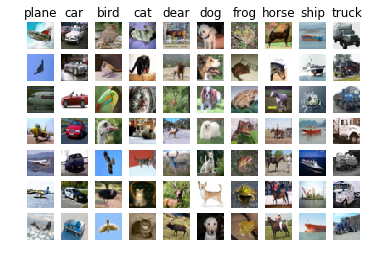

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'dear', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
num_each_class = 7

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(Ytr == y)
    idxs = np.random.choice(idxs, num_each_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + (y + 1)
        plt.subplot(num_each_class, num_classes, plt_idx)
        plt.imshow(Xtr[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()


In [5]:
class Softmax(object):
	def __init__(self):
		pass    
	def train(self,W, X, y, reg):
		loss = 0.0
		dW = np.zeros_like(W)
		num_train = X.shape[0]
		num_classes = W.shape[1]
		scores = X.dot(W)
		scores = scores - np.max(scores, axis = 1).reshape(-1,1)
		softmax = np.exp(scores) / np.sum(np.exp(scores), axis=1).reshape(-1,1)
		loss = -np.sum(np.log(softmax[range(num_train), list(y)]))
		loss /= num_train
		loss += 0.5 * reg * np.sum(W * W)
		dS = softmax.copy()
		dS[range(num_train), list(y)] += -1
		dW = (X.T).dot(dS)
		dW = dW / num_train + reg * W  
		return loss, dW
    
	def predict(self,X,Y,W):
		scores=X.dot(W)
		Yte_predict = np.argmax(scores, axis=1)
		acc = np.mean(Yte_predict == Y)
		return acc

In [6]:
Xte = Xtr[:1000, :] # take first 1000 for validation
Yte = Ytr[:1000]
Xtr = Xtr[1000:, :] # keep last 49,000 for train
Ytr = Ytr[1000:]

In [7]:
#HOG算子
Xtr=HogFeature(Xtr)
print(Xtr.shape)
Xte=HogFeature(Xte)
print(Xte.shape)
num_sample=Xtr.shape[0]
#print(num_sample)
num_test=Xte.shape[0]
#print(num_test)

(49000, 81)
(1000, 81)


In [8]:
#处理训练数据
#num_sample=Xtr.shape[0]
#Xtr=Xtr.reshape(num_sample,-1)
#Xtravg=np.mean(Xtr)#, axis=1)
#Xtr-=Xtravg
b=np.ones((num_sample,1))
X_train=np.c_[Xtr,b]
print(X_train.shape)
#处理测试数据
#num_test=Xte.shape[0]
Yte_predict=np.zeros(num_test)
#Xte=Xte.reshape(num_test,-1)
b=np.ones((num_test,1))
X_test=np.c_[Xte,b]
print(X_test.shape)
#定义权重 步长 正则化系数
W=np.random.randn(X_train.shape[1],10)*0.001
#reg=0.0001
reg=0.000001
#step=0.000001
step=10

(49000, 82)
(1000, 82)


In [9]:
softmax=Softmax()
#train
for i in range(10000):
    loss,dW=softmax.train(W,X_train,Ytr,reg)
    W-= dW*step
    print("round:%d  loss:%f" % (i,loss))
print("W has been coculated")

round:0  loss:2.302587
round:1  loss:2.301504
round:2  loss:2.300425
round:3  loss:2.299349
round:4  loss:2.298277
round:5  loss:2.297208
round:6  loss:2.296142
round:7  loss:2.295080
round:8  loss:2.294021
round:9  loss:2.292965
round:10  loss:2.291913
round:11  loss:2.290864
round:12  loss:2.289818
round:13  loss:2.288776
round:14  loss:2.287737
round:15  loss:2.286701
round:16  loss:2.285668
round:17  loss:2.284639
round:18  loss:2.283613
round:19  loss:2.282590
round:20  loss:2.281570
round:21  loss:2.280554
round:22  loss:2.279541
round:23  loss:2.278531
round:24  loss:2.277524
round:25  loss:2.276520
round:26  loss:2.275520
round:27  loss:2.274523
round:28  loss:2.273529
round:29  loss:2.272538
round:30  loss:2.271550
round:31  loss:2.270565
round:32  loss:2.269583
round:33  loss:2.268605
round:34  loss:2.267629
round:35  loss:2.266657
round:36  loss:2.265688
round:37  loss:2.264721
round:38  loss:2.263758
round:39  loss:2.262798
round:40  loss:2.261841
round:41  loss:2.260887
ro

round:333  loss:2.074000
round:334  loss:2.073570
round:335  loss:2.073140
round:336  loss:2.072711
round:337  loss:2.072284
round:338  loss:2.071857
round:339  loss:2.071431
round:340  loss:2.071006
round:341  loss:2.070582
round:342  loss:2.070158
round:343  loss:2.069736
round:344  loss:2.069314
round:345  loss:2.068894
round:346  loss:2.068474
round:347  loss:2.068055
round:348  loss:2.067637
round:349  loss:2.067220
round:350  loss:2.066804
round:351  loss:2.066388
round:352  loss:2.065974
round:353  loss:2.065560
round:354  loss:2.065147
round:355  loss:2.064735
round:356  loss:2.064324
round:357  loss:2.063914
round:358  loss:2.063504
round:359  loss:2.063095
round:360  loss:2.062688
round:361  loss:2.062281
round:362  loss:2.061874
round:363  loss:2.061469
round:364  loss:2.061065
round:365  loss:2.060661
round:366  loss:2.060258
round:367  loss:2.059856
round:368  loss:2.059455
round:369  loss:2.059054
round:370  loss:2.058654
round:371  loss:2.058256
round:372  loss:2.057858


round:661  loss:1.967652
round:662  loss:1.967404
round:663  loss:1.967157
round:664  loss:1.966910
round:665  loss:1.966664
round:666  loss:1.966417
round:667  loss:1.966171
round:668  loss:1.965926
round:669  loss:1.965681
round:670  loss:1.965436
round:671  loss:1.965191
round:672  loss:1.964947
round:673  loss:1.964703
round:674  loss:1.964459
round:675  loss:1.964216
round:676  loss:1.963973
round:677  loss:1.963731
round:678  loss:1.963488
round:679  loss:1.963246
round:680  loss:1.963005
round:681  loss:1.962763
round:682  loss:1.962522
round:683  loss:1.962282
round:684  loss:1.962041
round:685  loss:1.961801
round:686  loss:1.961562
round:687  loss:1.961322
round:688  loss:1.961083
round:689  loss:1.960844
round:690  loss:1.960606
round:691  loss:1.960368
round:692  loss:1.960130
round:693  loss:1.959893
round:694  loss:1.959655
round:695  loss:1.959419
round:696  loss:1.959182
round:697  loss:1.958946
round:698  loss:1.958710
round:699  loss:1.958474
round:700  loss:1.958239


round:989  loss:1.900930
round:990  loss:1.900762
round:991  loss:1.900595
round:992  loss:1.900427
round:993  loss:1.900260
round:994  loss:1.900093
round:995  loss:1.899926
round:996  loss:1.899760
round:997  loss:1.899593
round:998  loss:1.899427
round:999  loss:1.899261
W has been coculated


In [11]:
#predict
acc=softmax.predict(X_test,Yte,W)
print("accuracy: %f" % (acc,))

accuracy: 0.397000
